# 1. Import library

In [1]:
# Dataframe manipulation
import numpy as np
import pandas as pd
import math

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = 'whitegrid',context = 'notebook')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# generate classification report using predictions for categorical model
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn import (metrics,  linear_model, preprocessing)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, learning_curve, StratifiedKFold

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


# 2. Import dataset

In [2]:
df = pd.read_csv('Credit_Card_Applications.csv')
print(df.shape)
df.head()

(690, 16)


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


# 3. Data Preprocessing

### Feature Scaling

In [3]:
df = df.drop(['CustomerID'],axis =1)
df = df.reset_index(drop=True)

scaler = MinMaxScaler(feature_range = (0, 1))
selected_features = [var for var in df.columns if var not in ['Class']]

X_scaled = df[selected_features]
X_scaled = pd.DataFrame(scaler.fit_transform(X_scaled))
X_scaled.columns = selected_features
print(X_scaled.shape)
X_scaled.head()

(690, 14)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05,0.01212
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08,0.00000
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14,0.00000
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00,0.00000
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03,0.00158


In [7]:
X_scaled.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,0.267943,0.169954,0.383333,0.490190,0.461594,0.078014,0.523188,0.427536,0.035821,0.457971,0.464493,0.092007,0.010174
std,0.467482,0.178245,0.177792,0.215031,0.283328,0.249040,0.117422,0.499824,0.495080,0.072581,0.498592,0.149407,0.086080,0.052101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.134135,0.035714,0.500000,0.230769,0.375000,0.005789,0.000000,0.000000,0.000000,0.000000,0.500000,0.040000,0.000000
50%,1.000000,0.223684,0.098214,0.500000,0.538462,0.375000,0.035088,1.000000,0.000000,0.000000,0.000000,0.500000,0.080000,0.000050
75%,1.000000,0.360263,0.257411,0.500000,0.692308,0.500000,0.092105,1.000000,1.000000,0.044776,1.000000,0.500000,0.136000,0.003955
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split data into X & y

In [4]:
X = X_scaled  #independent columns
y = df['Class']    #target column i.e price range

scaled_df = pd.concat([X,y],axis=1)

### Split data into train and test set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)
X_train.shape, X_test.shape

((552, 14), (138, 14))

In [6]:
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

0.44565217391304346
0.4420289855072464


# 4. Predictive Model

### 4.1. Train logistic regrssion using statsmodel

In [25]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train_const)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.308273
         Iterations 9


In [26]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  552
Model:                          Logit   Df Residuals:                      537
Method:                           MLE   Df Model:                           14
Date:                Tue, 15 Sep 2020   Pseudo R-squ.:                  0.5514
Time:                        04:59:34   Log-Likelihood:                -170.17
converged:                       True   LL-Null:                       -379.35
Covariance Type:            nonrobust   LLR p-value:                 1.703e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8691      0.759     -6.417      0.000      -6.356      -3.382
A1            -0.0419      0.309     -0.136      0.892      -0.647       0.564
A2            -0.4391      0.860     -0.511      0.610      -2.124       1.246
A3            -0.7275      0.842     -0.863      0.388      -2.379       0.924
A4             1.1187      0.682      1.641      0.101      -0.217       2.455
A5             2.1845      0.593      3.682      0.000       1.022       3.347
A6             0.3240      0.646      0.502      0.616      -0.942       1.590
A7             1.5272      1.529      0.999      0.318      -1.469       4.523
A8             3.5194      0.354      9.949      0.000       2.826       4.213
A9             0.5044      0.394      1.282      0.200      -0.267       1.276
A10            8.6992      4.298      2.024      0.043       0.276      17.122
A11           -0.4024      0.294     -1.370      0.171      -0.978       0.173
A12            1.4349      0.961      1.494      0.135      -0.448       3.318
A13           -2.5941      1.857     -1.397      0.162      -6.233       1.045
A14           39.4404     17.248      2.287      0.022       5.634      73.247
==============================================================================
"""

In [27]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.551     
Dependent Variable: Class            AIC:              370.3329  
Date:               2020-09-15 04:59 BIC:              435.0361  
No. Observations:   552              Log-Likelihood:   -170.17   
Df Model:           14               LL-Null:          -379.35   
Df Residuals:       537              LLR p-value:      1.7029e-80
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -4.8691     0.7588   -6.4171   0.0000   -6.3563   -3.3819
A1        -0.0419     0.3090   -0.1356   0.8922   -0.6474    0.5636
A2        -0.4391     0.8597   -0.5107   0.6096   -2.1241    1.2460
A3        -0.7275     0.8425   -0.8635   0.3879   -2.3787    0.9238
A4         1.1187     0.6817    1.6410   0.1008   -0.2174    2.4548
A5         2.1845     0.5932    3.6822   0.0002    1.0217    3.3472
A6         0.3240     0.6459    0.5016   0.6159   -0.9420    1.5901
A7         1.5272     1.5287    0.9990   0.3178   -1.4691    4.5234
A8         3.5194     0.3538    9.9486   0.0000    2.8261    4.2128
A9         0.5044     0.3935    1.2817   0.2000   -0.2669    1.2757
A10        8.6992     4.2975    2.0242   0.0429    0.2762   17.1222
A11       -0.4024     0.2937   -1.3701   0.1707   -0.9781    0.1733
A12        1.4349     0.9606    1.4938   0.1352   -0.4478    3.3175
A13       -2.5941     1.8567   -1.3971   0.1624   -6.2332    1.0451
A14       39.4404    17.2485    2.2866   0.0222    5.6340   73.2468
=================================================================

"""

#### Retrain model, using only significant features

In [28]:
X_train1 = X_train[['A5','A8','A10','A14']]
X_train_all = sm.add_constant(X_train1)
model = sm.Logit(y_train, X_train_all)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.320263
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.534     
Dependent Variable: Class            AIC:              363.5699  
Date:               2020-09-15 04:59 BIC:              385.1377  
No. Observations:   552              Log-Likelihood:   -176.78   
Df Model:           4                LL-Null:          -379.35   
Df Residuals:       547              LLR p-value:      2.1670e-86
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -4.1667     0.4025   -10.3519   0.0000   -4.9556   -3.3778
A5        2.3530     0.5289     4.4488   0.0000    1.3164    3.3897
A8        3.4054     0.3217    10.5859   0.0000    2.7749    4.0359
A10      13.9894     3.3247     4.2077   0.0000    7.4731   20.5057
A14      42.6832    16.6470     2.5640   0.0103   10.0558   75.3106
=================================================================

"""

In [29]:
y_train_pred = result.predict(X_train_all)

### 4.2. Train and perform cross validation

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
kfold = KFold(n_splits = 10, random_state = 10)
scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
scores

array([0.80357143, 0.80357143, 0.89090909, 0.85454545, 0.90909091,
       0.87272727, 0.87272727, 0.87272727, 0.94545455, 0.85454545])

In [15]:
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std()))

Accuracy: 86.80% (+/- 4.12%)


In [16]:
pd.Series(scores).describe()

count    10.000000
mean      0.867987
std       0.043389
min       0.803571
25%       0.854545
50%       0.872727
75%       0.886364
max       0.945455
dtype: float64

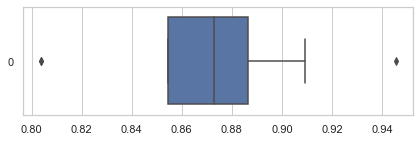

In [17]:
plt.figure(figsize=(7,2))
sns.boxplot(data=scores, orient='h')
plt.show()

### 4.3. Train logistic regression using sklearn

#### Train model

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Prediction

In [35]:
y_train_pred = model.predict(X_train)
prob_train_pred = model.predict_proba(X_train)

y_test_pred = model.predict(X_test)
prob_test_pred = model.predict_proba(X_test)

### 4.4. Model Interpretation

#### intercept and coefficients

In [36]:
model.intercept_

array([-4.37654947])

In [37]:
model.coef_

array([[-0.09137432,  0.11647663,  0.04488628,  0.66244486,  1.7402642 ,
         0.47289414,  0.67103042,  3.27578404,  1.16639074,  0.83183246,
        -0.34413918,  0.87923544, -0.71671861,  0.50618876]])

In [38]:
feature_names = X.columns.values
coefficient_list = list(model.coef_[0])
feature_coefficient = [(feature, coefficient) for feature, coefficient in zip(feature_names, coefficient_list)]
feature_coefficient

[('A1', -0.09137432001356298),
 ('A2', 0.11647663382716296),
 ('A3', 0.04488627935076507),
 ('A4', 0.6624448612483903),
 ('A5', 1.7402642029586564),
 ('A6', 0.47289413984358664),
 ('A7', 0.6710304228606382),
 ('A8', 3.275784039730191),
 ('A9', 1.1663907429935876),
 ('A10', 0.8318324573802774),
 ('A11', -0.344139183645137),
 ('A12', 0.8792354376330818),
 ('A13', -0.7167186052441088),
 ('A14', 0.5061887592970667)]

In [39]:
#get feature importances from the model
headers = ["name", "score"]
coefficient_list = np.abs(list(model.coef_[0]))
values = sorted(zip(feature_names, coefficient_list), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = headers)
feature_importances

,name,score
0,A8,3.275784
1,A5,1.740264
2,A9,1.166391
3,A12,0.879235
4,A10,0.831832
5,A13,0.716719
6,A7,0.671030
7,A4,0.662445
8,A14,0.506189
9,A6,0.472894


#### Summary table

In [40]:
def LogisticSummaryTable(classifier, X):
    feature_name = X.columns.values
    summary_table = pd.DataFrame(columns=['feature_name'], data = feature_name)
    summary_table['Coefficient'] = np.transpose(classifier.coef_)
    summary_table.index = summary_table.index + 1
    summary_table.loc[0] = ['Intercept', classifier.intercept_[0]]
    summary_table = summary_table.sort_index()
    summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
    summary_table.sort_values('Odds_ratio', ascending = False)

    return summary_table

In [41]:
LogisticSummaryTable(model, X_train)

,feature_name,Coefficient,Odds_ratio
0,Intercept,-4.376549,0.012569
1,A1,-0.091374,0.912676
2,A2,0.116477,1.123531
3,A3,0.044886,1.045909
4,A4,0.662445,1.939528
5,A5,1.740264,5.698849
6,A6,0.472894,1.604632
7,A7,0.671030,1.956252
8,A8,3.275784,26.463966
9,A9,1.166391,3.210385


### 4.4. Evaluation

#### Accuracy

In [42]:
accuracy_score(y_train, y_train_pred)

0.8677536231884058

In [43]:
accuracy_score(y_test, y_test_pred)

0.855072463768116

#### Confusion matrix & Classification Report

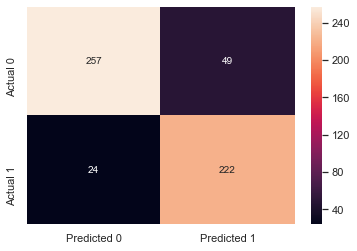

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       306
           1       0.82      0.90      0.86       246

    accuracy                           0.87       552
   macro avg       0.87      0.87      0.87       552
weighted avg       0.87      0.87      0.87       552



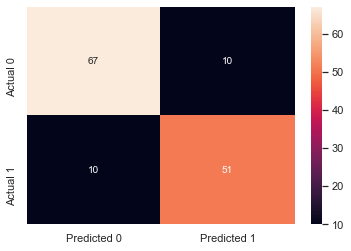

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

In [47]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        77
           1       0.84      0.84      0.84        61

    accuracy                           0.86       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.86      0.86      0.86       138



#### ROC AUC Score

In [48]:
roc_auc_score(y_train, prob_train_pred[:,1])

0.9341357139061586

In [49]:
roc_auc_score(y_test, prob_test_pred[:,1])

0.9112199276133702

#### ROC Curve

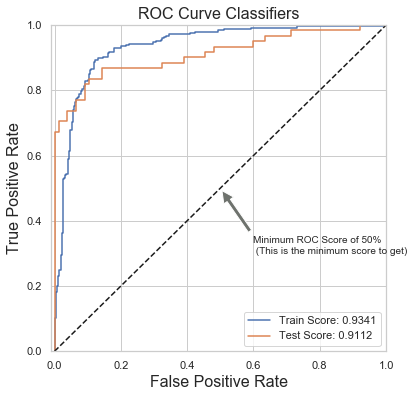

In [50]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, prob_train_pred[:,1])
fpr_test, tpr_test, threshold = roc_curve(y_test, prob_test_pred[:,1])

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, prob_train_pred[:,1])))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, prob_test_pred[:,1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()

#### Precision-Recall curve

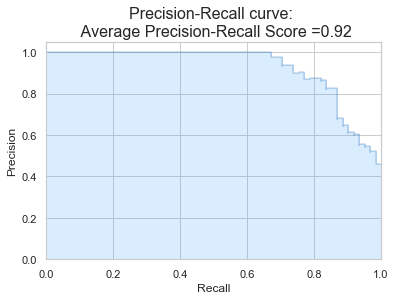

In [51]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_test_pred[:,1]
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)
plt.show()

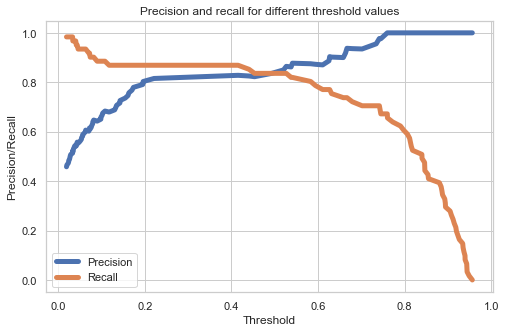

In [52]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.91')

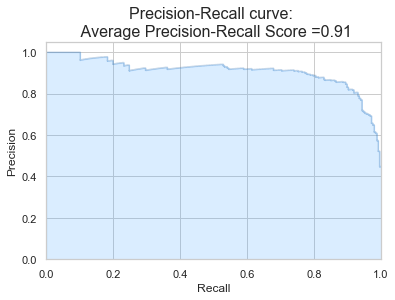

In [53]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_train_pred[:,1]
precision, recall, threshold = precision_recall_curve(y_train,y_score)
average_precision = average_precision_score(y_train, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

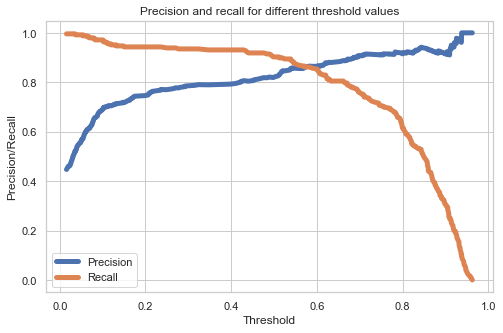

In [54]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

#### Summary

In [55]:
def ModelEvaluation(model,X_train,y_train,X_test,y_test,name):
    print('Model Evaluation of ' + name)

    print('-----------------------------------------------------------')
    print('Train set')
    print('Accuracy: ', accuracy_score(y_train, y_train_pred))
    print('ROC AUC Score: ', roc_auc_score(y_train, prob_train_pred[:,1]))
    cm_df = pd.DataFrame(confusion_matrix(y_train,y_train_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_train, y_train_pred))
    
    print('-----------------------------------------------------------')
    print('Test set')
    print('Accuracy: ', accuracy_score(y_test, y_test_pred))
    print('ROC AUC Score: ', roc_auc_score(y_test, prob_test_pred[:,1]))
    cm_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_test, y_test_pred))
    
ModelEvaluation(model,X_train,y_train,X_test,y_test,'Logistic Regression')

Model Evaluation of Logistic Regression
-----------------------------------------------------------
Train set
Accuracy:  0.8677536231884058
ROC AUC Score:  0.9341357139061586
Confusion matrix
Predicted    0    1
Actual             
0          257   49
1           24  222
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       306
           1       0.82      0.90      0.86       246

    accuracy                           0.87       552
   macro avg       0.87      0.87      0.87       552
weighted avg       0.87      0.87      0.87       552

-----------------------------------------------------------
Test set
Accuracy:  0.855072463768116
ROC AUC Score:  0.9112199276133702
Confusion matrix
Predicted   0   1
Actual           
0          67  10
1          10  51
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        77
           1       0.84      0.84      0.84        61

    accuracy   

### 4.5. Tuning hyper-parameters

#### Apply Grid search and KFold Cross Validation

In [56]:
# Specify parameters
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

grid_search = GridSearchCV(LogisticRegression(), params, cv = 10, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=libli

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, multi_class=ovr, penalty=l1, solver=liblinear ............
[CV]  C=100, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, multi_class=ovr, penalty=l1, solver=liblinear ............
[CV]  C=100, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, multi_class=ovr, penalty=l1, solver=liblinear ............
[CV]  C=100, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, multi_class=ovr, penalty=l1, solver=liblinear ............
[CV]  C=100, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, multi_class=ovr, penalty=l1, solver=liblinear ............
[CV]  C=100, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, multi_class=ovr, penalty=l1, solver=liblinear ............
[CV]  C=100, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, multi_class=ovr, penalty=l1, solver=liblinea

[CV]  C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg ............
[CV]  C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg ............
[CV]  C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg ............
[CV]  C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg ............
[CV]  C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg ............
[CV]  C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg ............
[CV]  C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=newton-c

[CV]  C=10, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=10, multi_class=ovr, penalty=l2, solver=newton-cg .............
[CV]  C=10, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=10, multi_class=ovr, penalty=l2, solver=newton-cg .............
[CV]  C=10, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=10, multi_class=ovr, penalty=l2, solver=newton-cg .............
[CV]  C=10, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[CV] .. C=10, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[CV] .. C=10, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[CV] .. C=10, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs ................

[CV]  C=1000, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=lbfgs ...............
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=lbfgs ...............
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=lbfgs ...............
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=lbfgs ...............
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=lbfgs ...............
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=lbfgs ...............
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=lbfgs ...............
[CV]  

[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    1.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'multi_class': ['ovr'], 'penalty': ['l2'],
                       

#### Best model

In [57]:
grid_search.best_params_

{'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}

In [58]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

#### Rerun with the best model

In [59]:
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 86.25% (+/- 7.82%)


In [60]:
scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 86.79% (+/- 7.15%)


In [61]:
scores

array([0.82142857, 0.83928571, 0.83636364, 0.83636364, 0.89090909,
       0.89090909, 0.83636364, 0.92727273, 0.89090909, 0.90909091])

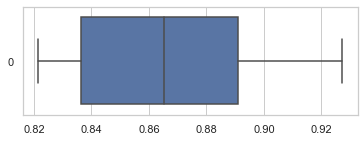

In [62]:
plt.figure(figsize=(6,2))
sns.boxplot(data=scores, orient='h')
plt.show()

In [63]:
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
prob_train_pred = best_model.predict_proba(X_train)

y_test_pred = best_model.predict(X_test)
prob_test_pred = best_model.predict_proba(X_test)

In [64]:
LogisticSummaryTable(best_model, X_train)

,feature_name,Coefficient,Odds_ratio
0,Intercept,-2.663332,0.069716
1,A1,-0.066272,0.935876
2,A2,0.132002,1.141111
3,A3,0.153387,1.165776
4,A4,0.242230,1.274087
5,A5,0.805288,2.237341
6,A6,0.386301,1.471528
7,A7,0.244292,1.276717
8,A8,2.172775,8.782622
9,A9,0.967533,2.631443


In [65]:
#get feature importances from the model
headers = ["name", "score"]
coefficient_list = np.abs(list(best_model.coef_[0]))
values = sorted(zip(feature_names, coefficient_list), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = headers)
feature_importances

,name,score
0,A8,2.172775
1,A9,0.967533
2,A5,0.805288
3,A6,0.386301
4,A7,0.244292
5,A4,0.242230
6,A10,0.210487
7,A12,0.184337
8,A3,0.153387
9,A2,0.132002


In [66]:
ModelEvaluation(best_model,X_train,y_train,X_test,y_test,'LogisticRegression')

Model Evaluation of LogisticRegression
-----------------------------------------------------------
Train set
Accuracy:  0.8713768115942029
ROC AUC Score:  0.9302965088474414
Confusion matrix
Predicted    0    1
Actual             
0          255   51
1           20  226
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       306
           1       0.82      0.92      0.86       246

    accuracy                           0.87       552
   macro avg       0.87      0.88      0.87       552
weighted avg       0.88      0.87      0.87       552

-----------------------------------------------------------
Test set
Accuracy:  0.8478260869565217
ROC AUC Score:  0.9012135405578029
Confusion matrix
Predicted   0   1
Actual           
0          66  11
1          10  51
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.82      0.84      0.83        61

    accuracy   

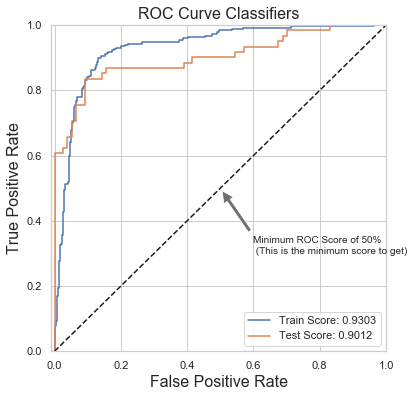

In [67]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, prob_train_pred[:,1])
fpr_test, tpr_test, threshold = roc_curve(y_test, prob_test_pred[:,1])

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, prob_train_pred[:,1])))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, prob_test_pred[:,1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()

In [68]:
y_score = best_model.decision_function(X_test)
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)

precision_recall_df = pd.DataFrame([precision[0:len(threshold)],recall[0:len(threshold)],threshold]).T
precision_recall_df.columns = ['precision','recall','threshold']
precision_recall_df.head(6)

,precision,recall,threshold
0,0.488000,1.000000,-2.314489
1,0.483871,0.983607,-2.312307
2,0.487805,0.983607,-2.307595
3,0.491803,0.983607,-2.301821
4,0.495868,0.983607,-2.298880
5,0.500000,0.983607,-2.260202


Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.91')

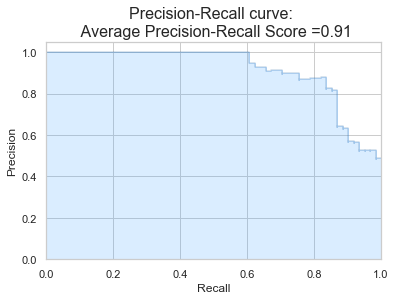

In [69]:
plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

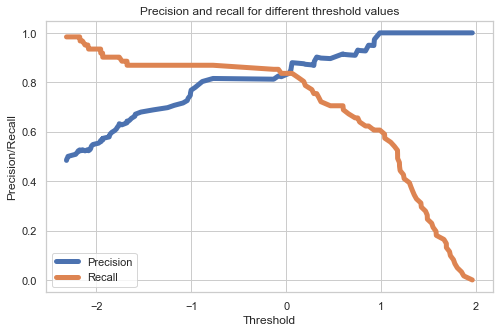

In [70]:
sns.set(style = 'whitegrid',context = 'notebook')
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()